<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#import-datasets" data-toc-modified-id="import-datasets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>import datasets</a></span></li><li><span><a href="#Add-an-attribute-&quot;readmission_days_btw&quot;-in-admission-dataset" data-toc-modified-id="Add-an-attribute-&quot;readmission_days_btw&quot;-in-admission-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Add an attribute "readmission_days_btw" in admission dataset</a></span></li><li><span><a href="#Evaluate-the-30-day-readmission-rate" data-toc-modified-id="Evaluate-the-30-day-readmission-rate-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Evaluate the 30-day readmission rate</a></span></li><li><span><a href="#Plot-30-day-readmission-rate-vs.-times-of-readmission" data-toc-modified-id="Plot-30-day-readmission-rate-vs.-times-of-readmission-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plot 30-day readmission rate vs. times of readmission</a></span></li><li><span><a href="#Add-attribute-'CTB_days'" data-toc-modified-id="Add-attribute-'CTB_days'-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Add attribute 'CTB_days'</a></span></li><li><span><a href="#Create-Label-'readmit_30_label'" data-toc-modified-id="Create-Label-'readmit_30_label'-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Create Label 'readmit_30_label'</a></span></li><li><span><a href="#Create-Label-'inhospital_ctb_label'" data-toc-modified-id="Create-Label-'inhospital_ctb_label'-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Create Label 'inhospital_ctb_label'</a></span></li><li><span><a href="#Create-Label-'ctb'-in-admission-dataset" data-toc-modified-id="Create-Label-'ctb'-in-admission-dataset-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Create Label 'ctb' in admission dataset</a></span></li><li><span><a href="#Plot-30-day-readmission-rate-for-ctb_label=0-and-=1-seperately" data-toc-modified-id="Plot-30-day-readmission-rate-for-ctb_label=0-and-=1-seperately-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Plot 30-day readmission rate for ctb_label=0 and =1 seperately</a></span></li><li><span><a href="#Plot-inhospital-mortality-rate-&amp;-all-cause-mortality-rate" data-toc-modified-id="Plot-inhospital-mortality-rate-&amp;-all-cause-mortality-rate-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Plot inhospital mortality rate &amp; all-cause mortality rate</a></span></li><li><span><a href="#Plot-overall-readmission-rate" data-toc-modified-id="Plot-overall-readmission-rate-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Plot overall readmission rate</a></span></li><li><span><a href="#Proportion-left-if-use-first-15-admissions" data-toc-modified-id="Proportion-left-if-use-first-15-admissions-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Proportion left if use first 15 admissions</a></span></li><li><span><a href="#Save-the-updated-admission-dataset" data-toc-modified-id="Save-the-updated-admission-dataset-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Save the updated admission dataset</a></span></li><li><span><a href="#how-many-days-of-current-admission-we-can-use-for-prediction" data-toc-modified-id="how-many-days-of-current-admission-we-can-use-for-prediction-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>how many days of current admission we can use for prediction</a></span></li><li><span><a href="#how-many-patients-have-taken-bio-measurement" data-toc-modified-id="how-many-patients-have-taken-bio-measurement-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>how many patients have taken bio measurement</a></span></li><li><span><a href="#Patient-Longitudinal-Plot" data-toc-modified-id="Patient-Longitudinal-Plot-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Patient Longitudinal Plot</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pd.options.display.max_rows = 400
pd.options.display.max_columns = 50

# import datasets

In [2]:
%cd ~/desktop/HF_Research/datasets

baseline = pd.read_excel('Advanced Therapy Potential Cohort.xlsx', 'cohort baseline')
admission = pd.read_excel('Advanced Therapy Potential Cohort.xlsx', 'cohort admission')

/Users/jinchenxie/Desktop/HF_Research/datasets


In [3]:
raw_baseline = pd.read_excel('HF-Baseline.xlsx', '00480_Baseline_20200115_NA')

In [4]:
raw_admission = pd.read_excel('HF-Admissions.xlsx', '00480_Admissions_20200115_NA')

# Add an attribute "readmission_days_btw" in admission dataset

This attribute measure the days in between 2 admissions of the patient.

In [199]:
readmission_days_data = admission[['rID','LOS_DAYS', 'READMISSION_DAYS']]

In [200]:
readmission_days_data.fillna(value=0, inplace=True)

/Users/jinchenxie/miniconda3/envs/research_env/lib/python3.6/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [201]:
days_btw_list = []
for i in readmission_days_data.rID.unique():
    temp = readmission_days_data.loc[admission['rID']==i]
    temp.reset_index(drop=True, inplace=True)
    if temp.shape[0]==1:
        days_btw_list.append(0)
        continue
    else: 
        for j in range(temp.shape[0]-1):
            if j==0:
                days_btw_list.append(temp.iloc[1].READMISSION_DAYS)
            else:
                days_btw_list.append(temp.iloc[j+1].READMISSION_DAYS 
                                     - temp.iloc[j].READMISSION_DAYS
                                     - temp.iloc[j].LOS_DAYS)
        days_btw_list.append(0)

In [202]:
admission['readmission_days_btw'] = days_btw_list

# Evaluate the 30-day readmission rate

In [203]:
readmission_30_days = admission.loc[(admission['readmission_days_btw']<=30) 
                                    & (admission['readmission_days_btw']>0)]

In [204]:
readmission_30_days.shape

(3736, 174)

In [205]:
readmission_30_days.shape[0]/(admission[admission['INDEX_HOSPITALIZATION']==0].shape[0])

0.34624652455977756

# Plot 30-day readmission rate vs. times of readmission

In [206]:
# assign admission_n dataframes
admission_1 = admission.loc[admission['admission_times']==1]
admission_2 = admission.loc[admission['admission_times']==2]
admission_3 = admission.loc[admission['admission_times']==3]
admission_4 = admission.loc[admission['admission_times']==4]
admission_5 = admission.loc[admission['admission_times']==5]
admission_6 = admission.loc[admission['admission_times']==6]
admission_7 = admission.loc[admission['admission_times']==7]
admission_8 = admission.loc[admission['admission_times']==8]
admission_9 = admission.loc[admission['admission_times']==9]
admission_10 = admission.loc[admission['admission_times']==10]
admission_11 = admission.loc[admission['admission_times']==11]
admission_12 = admission.loc[admission['admission_times']==12]
admission_13 = admission.loc[admission['admission_times']==13]
admission_14 = admission.loc[admission['admission_times']==14]
admission_15 = admission.loc[admission['admission_times']==15]
admission_16 = admission.loc[admission['admission_times']==16]
admission_17 = admission.loc[admission['admission_times']==17]
admission_18 = admission.loc[admission['admission_times']==18]
admission_19 = admission.loc[admission['admission_times']==19]
admission_20 = admission.loc[admission['admission_times']==20]
admission_21 = admission.loc[admission['admission_times']==21]
admission_22 = admission.loc[admission['admission_times']==22]
admission_23 = admission.loc[admission['admission_times']==23]
admission_24 = admission.loc[admission['admission_times']==24]
admission_25 = admission.loc[admission['admission_times']==25]
admission_26 = admission.loc[admission['admission_times']==26]
admission_27 = admission.loc[admission['admission_times']==27]
admission_28 = admission.loc[admission['admission_times']==28]
admission_29 = admission.loc[admission['admission_times']==29]
admission_30 = admission.loc[admission['admission_times']==30]

In [207]:
list_df_admission_num = [admission_1, admission_2, admission_3, admission_4, admission_5,
                            admission_6, admission_7, admission_8, admission_9, admission_10,
                            admission_11, admission_12, admission_13, admission_14, admission_15,
                            admission_16, admission_17, admission_18, admission_19, admission_20,
                            admission_21, admission_22, admission_23, admission_24, admission_25,
                            admission_26, admission_27, admission_28, admission_29, admission_30
                        ]

In [208]:
days_btw_list = []
for d in list_df_admission_num:
    days_btw_list.append(d.loc[(d['readmission_days_btw']<=30)
                              & (d['readmission_days_btw']>0)].shape[0]/d.shape[0])

In [209]:
num_adm = np.arange(1, 31)

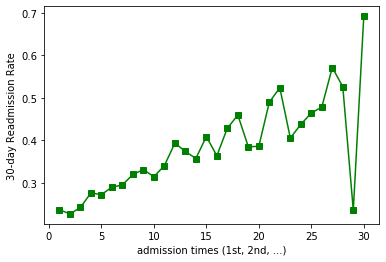

In [210]:
plt.plot(num_adm, days_btw_list,'s-',color = 'g',label="30-day readmission rate")
plt.xlabel("admission times (1st, 2nd, ...)")
plt.ylabel("30-day Readmission Rate")
plt.savefig('/Users/jinchenxie/Desktop/HF_Research/Plots/30_day_readmission_rate_vs_admissions')
plt.show()

# Add attribute 'CTB_days'
CTB_days = FOLLOWUP_DAYS + LOS_DAYS - READMISSION_DAYS


In [67]:
del(morta_admissions)

In [68]:
# patients who have CTB = 1
mortality_pat = baseline.loc[baseline['CTB']==1]
morta_rID = mortality_pat.rID

In [70]:
# patients whose last admissions are included, 
# exclude patients who got VAD and transplant during admissions
morta_admissions = admission.loc[admission['rID'].isin(morta_rID)]
morta_admissions = morta_admissions.loc[morta_admissions['last_adm']==1]

In [72]:
# update the list of patients included 
morta_rID = morta_admissions.rID
mortality_pat = baseline.loc[baseline['rID'].isin(morta_rID)]

In [81]:
# we need to use LOS_DAYS for index admission in calculation
temp_for_losdays = admission.loc[(admission['rID'].isin(morta_rID)) & 
                                  (admission['INDEX_HOSPITALIZATION']==1)]

In [119]:
temp_losdays = temp_for_losdays['LOS_DAYS']
temp_losdays.reset_index(inplace=True, drop=True)

In [120]:
temp_followupdays = mortality_pat['FOLLOWUP_DAYS']
temp_followupdays.reset_index(inplace=True, drop=True)

In [121]:
temp_readmdays = morta_admissions['READMISSION_DAYS'].fillna(value=0)
temp_readmdays.reset_index(inplace=True, drop=True)

In [129]:
morta_admissions.reset_index(inplace=True, drop=True)
temp_ctb_days = temp_followupdays+temp_losdays-temp_readmdays
morta_admissions['CTB_DAYS'] = temp_ctb_days

In [134]:
morta_admissions[morta_admissions['CTB_DAYS']<0].shape


(178, 176)

In [135]:
admission[admission['READMISSION_DAYS']<1]

,rID,INDEX_HOSPITALIZATION,HOSPITAL,READMISSION_DAYS,LOS_DAYS,HOSP_CR,HOSP_BILI,HOSP_INR,HOSP_NA,HOSP_EGFR,AGE_ADMISSION,ADMISSION_SOURCE,IPOP,PATIENT_TYPE_CODE,PATIENT_TYPE_DESCRIPTION,PATIENT_TYPE_GROUP,DISPOSITION,FINANCIAL_CLASS_CODE,FINANCIAL_CLASS,HOSP_ROLLUP_GROUPING1,HOSP_ROLLUP_GROUPING2,DC_MILRINONE,DC_DOBUTAMINE,DC_DOPAMINE,LVEF,...,ARRESTFLAG,VTACHFLAG,VFIBFLAG,PCI,PCI_DAYS,IMPELLA,IMPELLA_DAYS,IABP,IABP_DAYS,ECMO,ECMO_DAYS,ABLATION,ABLATION_DAYS,PACEMAKER_IMPLANT,PACEMAKER_IMPLANT_DAYS,ICD_IMPLANT,ICD_IMPLANT_DAYS,BIV_ICD_IMPLANT,BIV_ICD_IMPLANT_DAYS,CRT_IMPLANT,CRT_IMPLANT_DAYS,admission_times,last_adm,readmission_days_btw,readmission_days_real
255,276,0,PUH,0.338,4.909,1.50,NaN,1.2,142.0,48.07,57,MEDICAL REFERRAL,IP,I,I INPATIENT,IP ACUTE,HOME/SELF CARE,Q,B/C KEYSTONE,Highmark Commercia,Commercial,NaN,NaN,NaN,NaN,...,0,1,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,2,0,13.088,8.179
401,423,0,PUH,0.890,13.030,1.50,1.3,2.8,137.0,54.12,32,HOSPITAL TRANSFER,IP,I,I INPATIENT,IP ACUTE,HOME/SELF CARE,2,MEDICARE TRANSPLANT,Medicare,Medicare,NaN,NaN,NaN,NaN,...,0,1,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,2,0,108.109,95.079
450,458,0,PUH,0.042,4.649,1.50,0.5,1.1,134.0,66.77,29,HOSPITAL TRANSFER,IP,I,I INPATIENT,IP ACUTE,HOME/SELF CARE,S,MEDICAL ASSIST PA,Medicaid,Medicaid,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,2,0,334.718,330.069
473,471,0,PAS,0.082,9.824,1.75,NaN,2.7,141.0,39.19,66,HOSPITAL TRANSFER,IP,I,I INPATIENT,IP ACUTE,SKILLED NURS FACIL,M,MEDICARE PART A,Medicare,Medicare,0.0,0.0,0.0,NaN,...,0,0,0,0,NaN,0,NaN,0,NaN,0,NaN,1,7,0,NaN,0,NaN,1,7.0,0,NaN,2,1,0.000,-9.824
489,475,0,PUH,0.030,8.807,1.50,NaN,1.4,137.0,34.58,67,HOSPITAL TRANSFER,IP,I,I INPATIENT,IP ACUTE,SKILLED NURS FACIL,GG,GATEWAY MGD MCARE,Other MC Managed,Medicare,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,2,0,846.015,837.208
526,512,0,PUH,0.083,13.959,1.50,0.6,1.9,145.0,33.92,74,HOSPITAL TRANSFER,IP,I,I INPATIENT,IP ACUTE,SKILLED NURS FACIL,M,MEDICARE PART A,Medicare,Medicare,0.0,0.0,0.0,NaN,...,0,0,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,2,1,0.000,-13.959
559,555,0,PAS,0.367,9.915,0.80,0.8,1.5,143.0,95.16,71,MEDICAL REFERRAL,IP,I,I INPATIENT,IP ACUTE,HOME HEALTH AGENCY,MS,SECURITY BLUE HMO,Security Blue,Medicare,NaN,NaN,NaN,35.0,...,0,0,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,2,0,1679.779,1669.864
692,667,0,PUH,0.108,9.884,1.30,1.1,1.2,139.0,58.50,49,HOSPITAL TRANSFER,IP,I,I INPATIENT,IP ACUTE,HOME HEALTH AGENCY,BE,BEST HEALTH CARE,UPMC MA Managed,Medicaid,NaN,NaN,NaN,20.0,...,0,1,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,8.0,0,NaN,0,NaN,2,0,761.008,751.124
766,743,0,SHY,0.028,8.009,1.10,NaN,1.6,140.0,49.64,66,HOSPITAL TRANSFER,IP,I,I INPATIENT,IP ACUTE,HOME HEALTH AGENCY,UM,UPMC HP MEDICARE HM,UPMC MC Managed,Medicare,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,2,0,857.931,849.922
771,745,0,PUH,0.082,13.000,1.40,3.8,1.8,142.0,54.08,47,HOSPITAL TRANSFER,IP,I,I INPATIENT,IP ACUTE,HOME HEALTH AGENCY,4N,UNTD HLTH CR MGD TX,National Payers,Commercial,0.0,0.0,0.0,20.0,...,0,0,0,0,NaN,1,0.0,0,NaN,0,NaN,1,8,0,NaN,0,NaN,0,NaN,0,NaN,2,1,0.000,-13.000


In [180]:
admission[admission['rID']==16]

,rID,INDEX_HOSPITALIZATION,HOSPITAL,READMISSION_DAYS,LOS_DAYS,HOSP_CR,HOSP_BILI,HOSP_INR,HOSP_NA,HOSP_EGFR,AGE_ADMISSION,ADMISSION_SOURCE,IPOP,PATIENT_TYPE_CODE,PATIENT_TYPE_DESCRIPTION,PATIENT_TYPE_GROUP,DISPOSITION,FINANCIAL_CLASS_CODE,FINANCIAL_CLASS,HOSP_ROLLUP_GROUPING1,HOSP_ROLLUP_GROUPING2,DC_MILRINONE,DC_DOBUTAMINE,DC_DOPAMINE,LVEF,...,VTACHFLAG,VFIBFLAG,PCI,PCI_DAYS,IMPELLA,IMPELLA_DAYS,IABP,IABP_DAYS,ECMO,ECMO_DAYS,ABLATION,ABLATION_DAYS,PACEMAKER_IMPLANT,PACEMAKER_IMPLANT_DAYS,ICD_IMPLANT,ICD_IMPLANT_DAYS,BIV_ICD_IMPLANT,BIV_ICD_IMPLANT_DAYS,CRT_IMPLANT,CRT_IMPLANT_DAYS,admission_times,last_adm,readmission_days_btw,readmit_30_label,inhospital_ctb_label
6,16,1,SMH,NaN,9.145,1.35,0.8,1.1,139.0,51.64,74,MEDICAL REFERRAL,IP,I,I INPATIENT,IP ACUTE,REHAB/INPT REHAB UNT,M,MEDICARE PART A,Medicare,Medicare,0.0,0.0,0.0,30.0,...,0,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,0,93.290,0,0
7,16,0,SMH,93.290,3.655,1.14,NaN,1.2,138.0,62.72,74,MEDICAL REFERRAL,IP,I,I INPATIENT,IP ACUTE,REHAB/INPT REHAB UNT,M,MEDICARE PART A,Medicare,Medicare,NaN,NaN,NaN,30.0,...,0,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,2,0,28.808,1,0
8,16,0,SMH,125.753,5.087,1.34,1.1,1.3,141.0,52.03,74,MEDICAL REFERRAL,IP,I,I INPATIENT,IP ACUTE,SKILLED NURS FACIL,M,MEDICARE PART A,Medicare,Medicare,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,3,0,89.773,0,0
9,16,0,PUH,220.613,1.377,1.80,NaN,1.2,134.0,36.99,74,MEDICAL REFERRAL,OBS,S,S SAME DAY SERV,SAME DAY SERVICE,SKILLED NURS FACIL,M,MEDICARE PART A,Medicare,Medicare,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,0.0,0,NaN,0,NaN,4,0,63.213,0,0
10,16,0,PUH,285.203,2.816,1.70,NaN,2.8,137.0,39.49,74,MEDICAL REFERRAL,IP,I,I INPATIENT,IP ACUTE,SKILLED NURS FACIL,M,MEDICARE PART A,Medicare,Medicare,NaN,NaN,NaN,40.0,...,0,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,5,1,0.000,0,0


# Create Label 'readmit_30_label'
readmit_30_label = 1 if the patient got readmitted within 30 days after discharged from current admission.

In [166]:
admission['readmit_30_label'] = 0

In [177]:
admission.loc[readmission_30_days.index, 'readmit_30_label']=1

# Create Label 'inhospital_ctb_label'
inhospital_ctb_label = 1 if the patient died during the admission

In [216]:
inhospital_ctb = admission.loc[admission['DISPOSITION']=='CTB']
admission['inhospital_ctb_label'] = 0
admission.loc[inhospital_ctb.index, 'inhospital_ctb_label'] = 1

# Create Label 'ctb' in admission dataset
ctb = 1 if the patient in baseline has CTB = 1 

In [5]:
ctb_rID = baseline.loc[baseline['CTB']==1].rID

In [6]:
admission_rID_ctb = admission.loc[admission['rID'].isin(ctb_rID)]

In [7]:
admission['ctb_label'] = 0
admission.loc[admission_rID_ctb.index, 'ctb_label'] = 1

# Plot 30-day readmission rate for ctb_label=0 and =1 seperately

In [220]:
# assign admission_n dataframes
admission_1 = admission.loc[admission['admission_times']==1]
admission_2 = admission.loc[admission['admission_times']==2]
admission_3 = admission.loc[admission['admission_times']==3]
admission_4 = admission.loc[admission['admission_times']==4]
admission_5 = admission.loc[admission['admission_times']==5]
admission_6 = admission.loc[admission['admission_times']==6]
admission_7 = admission.loc[admission['admission_times']==7]
admission_8 = admission.loc[admission['admission_times']==8]
admission_9 = admission.loc[admission['admission_times']==9]
admission_10 = admission.loc[admission['admission_times']==10]
admission_11 = admission.loc[admission['admission_times']==11]
admission_12 = admission.loc[admission['admission_times']==12]
admission_13 = admission.loc[admission['admission_times']==13]
admission_14 = admission.loc[admission['admission_times']==14]
admission_15 = admission.loc[admission['admission_times']==15]
admission_16 = admission.loc[admission['admission_times']==16]
admission_17 = admission.loc[admission['admission_times']==17]
admission_18 = admission.loc[admission['admission_times']==18]
admission_19 = admission.loc[admission['admission_times']==19]
admission_20 = admission.loc[admission['admission_times']==20]
admission_21 = admission.loc[admission['admission_times']==21]
admission_22 = admission.loc[admission['admission_times']==22]
admission_23 = admission.loc[admission['admission_times']==23]
admission_24 = admission.loc[admission['admission_times']==24]
admission_25 = admission.loc[admission['admission_times']==25]
admission_26 = admission.loc[admission['admission_times']==26]
admission_27 = admission.loc[admission['admission_times']==27]
admission_28 = admission.loc[admission['admission_times']==28]
admission_29 = admission.loc[admission['admission_times']==29]
admission_30 = admission.loc[admission['admission_times']==30]

In [221]:
list_df_admission_num = [admission_1, admission_2, admission_3, admission_4, admission_5,
                            admission_6, admission_7, admission_8, admission_9, admission_10,
                            admission_11, admission_12, admission_13, admission_14, admission_15,
                            admission_16, admission_17, admission_18, admission_19, admission_20,
                            admission_21, admission_22, admission_23, admission_24, admission_25,
                            admission_26, admission_27, admission_28, admission_29, admission_30
                        ]

In [193]:
days_btw_list_0 = []
for d in list_df_admission_num:
    days_btw_list_0.append(d.loc[(d['readmission_days_btw']<=30)
                              & (d['readmission_days_btw']>0) 
                              & (d['ctb_label']==0)].shape[0]/d[d['ctb_label']==0].shape[0])

In [194]:
days_btw_list_1 = []
for d in list_df_admission_num:
    days_btw_list_1.append(d.loc[(d['readmission_days_btw']<=30)
                              & (d['readmission_days_btw']>0) 
                              & (d['ctb_label']==1)].shape[0]/d[d['ctb_label']==1].shape[0])

In [195]:
num_adm = np.arange(1, 31)

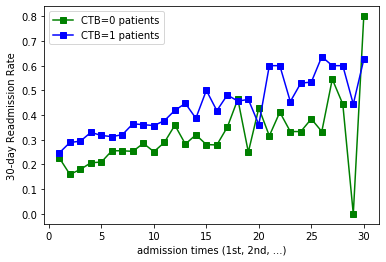

In [214]:
plt.plot(num_adm, days_btw_list_0,'s-',color = 'g',label="CTB=0 patients")
plt.plot(num_adm, days_btw_list_1,'s-',color = 'b',label="CTB=1 patients")
plt.xlabel("admission times (1st, 2nd, ...)")
plt.ylabel("30-day Readmission Rate")
plt.legend(loc='best')
plt.savefig('/Users/jinchenxie/Desktop/HF_Research/Plots/comparison_on_30_day_readmission_rate')
plt.show()

# Plot inhospital mortality rate & all-cause mortality rate

In [230]:
days_btw_list = []
for d in list_df_admission_num:
    days_btw_list.append((d.loc[d['inhospital_ctb_label']==1].shape[0])/(d.shape[0]))

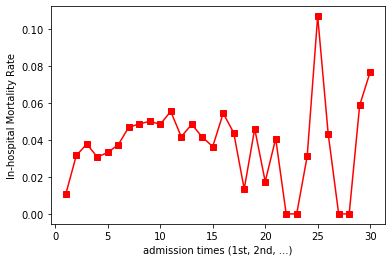

In [244]:
plt.plot(num_adm, days_btw_list,'s-',color = 'r',label="inhospital mortality")
plt.xlabel("admission times (1st, 2nd, ...)")
plt.ylabel("In-hospital Mortality Rate")
plt.savefig('/Users/jinchenxie/Desktop/HF_Research/Plots/inhospital_mortality_rate')
plt.show()

In [247]:
baseline['total_adms'].value_counts()

2     445
1     438
3     341
4     246
5     198
6     151
7     148
8     116
9      88
10     62
11     49
13     38
12     33
14     31
15     27
16     19
17     17
18      9
19      8
20      8
21      7
23      5
25      5
22      5
24      4
29      4
30      2
26      2
28      2
35      2
37      2
27      2
45      2
39      1
34      1
36      1
43      1
52      1
Name: total_adms, dtype: int64

In [248]:
num_adm_2 = np.arange(1, 16)

In [250]:
mortality_rate_list = []
for i in num_adm_2:
    mortality_rate_list.append(baseline.loc[(baseline['total_adms']==i) & 
                                            (baseline['CTB']==1)].shape[0]/
                              baseline.loc[baseline['total_adms']==i].shape[0])

In [257]:
mortality_rate_list_2 = []
for i in num_adm:
    mortality_rate_list_2.append(baseline.loc[(baseline['total_adms']==i) & 
                                            (baseline['CTB']==1)].shape[0]/
                              baseline.loc[baseline['total_adms']==i].shape[0])

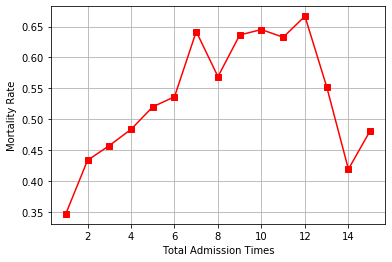

In [255]:
plt.plot(num_adm_2, mortality_rate_list,'s-',color = 'r',label="mortality rate")
plt.xlabel("Total Admission Times")
plt.ylabel("Mortality Rate")
plt.grid()
plt.savefig('/Users/jinchenxie/Desktop/HF_Research/Plots/mortality_rate')
plt.show()

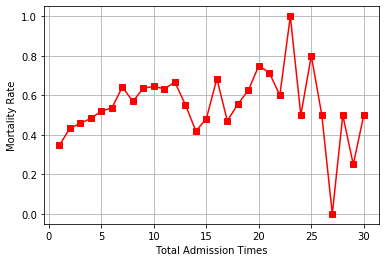

In [258]:
plt.plot(num_adm, mortality_rate_list_2,'s-',color = 'r',label="mortality rate")
plt.xlabel("Total Admission Times")
plt.ylabel("Mortality Rate")
plt.grid()
plt.savefig('/Users/jinchenxie/Desktop/HF_Research/Plots/mortality_rate_Large')
plt.show()

# Plot overall readmission rate

In [261]:
days_btw_list = []
for d in list_df_admission_num:
    days_btw_list.append(d.loc[(d['last_adm']==0)].shape[0]/d.shape[0])

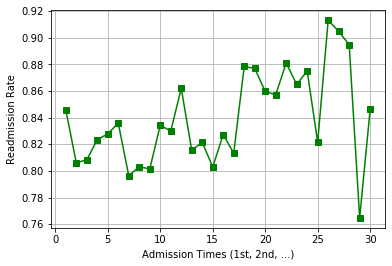

In [262]:
plt.plot(num_adm, days_btw_list,'s-',color = 'g',label="Readmission rate")
plt.xlabel("Admission Times (1st, 2nd, ...)")
plt.ylabel("Readmission Rate")
plt.grid()
plt.savefig('/Users/jinchenxie/Desktop/HF_Research/Plots/readmission_rate')
plt.show()

# Proportion left if use first 15 admissions

In [263]:
admission.columns

Index(['rID', 'INDEX_HOSPITALIZATION', 'HOSPITAL', 'READMISSION_DAYS',
       'LOS_DAYS', 'HOSP_CR', 'HOSP_BILI', 'HOSP_INR', 'HOSP_NA', 'HOSP_EGFR',
       ...
       'BIV_ICD_IMPLANT', 'BIV_ICD_IMPLANT_DAYS', 'CRT_IMPLANT',
       'CRT_IMPLANT_DAYS', 'admission_times', 'last_adm',
       'readmission_days_btw', 'readmit_30_label', 'inhospital_ctb_label',
       'ctb_label'],
      dtype='object', length=174)

In [264]:
admission_cut15 = admission.loc[admission['admission_times']<=15]

In [265]:
admission_cut15.shape

(12525, 174)

In [266]:
admission_cut15.shape[0]/admission.shape[0]

0.9409510930809105

# Save the updated admission dataset

In [267]:
writer = pd.ExcelWriter('Advanced Therapy Potential Cohort.xlsx')
baseline.to_excel(writer, 'cohort baseline')
admission.to_excel(writer, 'cohort admission')
admission_cut15.to_excel(writer, 'admission (upto 15th)')
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


# how many days of current admission we can use for prediction

In [ ]:
# all attributes labeled as sequential biological in admission dataset dict
sequential_measurements_days = ['rID', 'CLOSEST_LVEF_DAYS',
                               'CLOSEST_RV_FUNC_DAYS',
                               'CLOSEST_AR_DAYS',
                               'CLOSEST_MR_DAYS',
                               'CLOSEST_PR_DAYS',
                               'CLOSEST_TR_DAYS',
                               'CLOSEST_AS_DAYS',
                               'CLOSEST_MS_DAYS',
                               'CLOSEST_PS_DAYS']

In [270]:
admission[['rID','HOSP_CR']]

,rID,HOSP_CR
0,5,1.04
1,5,1.13
2,5,0.85
3,5,0.97
4,10,0.90
...,...,...
13306,12280,3.00
13307,12280,2.90
13308,12280,2.60
13309,12280,3.30


In [271]:
# all attributes labeled as sequential biological in admission dataset dict
sequential_measurements = ['rID', 'HOSP_CR',
'HOSP_BILI',
'HOSP_INR',
'HOSP_NA',
'HOSP_EGFR',
'DC_MILRINONE',
'DC_DOBUTAMINE',
'DC_DOPAMINE',
'LVEF',
'RV_FUNC',
'AR',
'MR',
'PR',
'TR',
'AS',
'MS',
'PS',
'TS',
'WBC',
'HGB',
'CR',
'EGFR',
'K',
'NA',
'HEMOGLOBIN_A1C',
'GLUCOSE',
'CHOLESTEROL',
'LDL',
'HDL',
'TRIGLYCERIDE',
'ALBUMIN',
'PREALBUMIN',
'PLATELETS',
'HCT',
'BUN',
'BNP',
'BILI',
'INR',
'HOSPITAL_MELD',
'MELD_EST_MORTALITY',
'RA_MEAN_PRESSURE',
'THERMAL_CARDIAC_INDEX',
'FICK_CARDIAC_INDEX',
'PA_SATURATION',
'WEDGE_MEAN_PRESSURE',
'PULM_ART_SYS_PRESSURE']

In [272]:
bio_measure_adm = admission_cut15[sequential_measurements]

In [273]:
bio_measure_na = bio_measure_adm.isna().sum()/admission_cut15.shape[0]

# how many patients have taken bio measurement

In [274]:
bio_measure_num_pat = {}
for i in range(len(sequential_measurements)-1):
    temp = bio_measure_adm[[sequential_measurements[0], sequential_measurements[i+1]]]
    temp.dropna(axis=0, inplace=True)
    bio_measure_num_pat[sequential_measurements[i+1]] = (len(temp.rID.unique()), len(temp.rID.unique())/baseline.shape[0])

/Users/jinchenxie/miniconda3/envs/research_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [275]:
# (# of patients that have this measurement, % of patients that have this measurement)
bio_measure_num_pat

{'HOSP_CR': (2518, 0.9988099960333201),
 'HOSP_BILI': (2359, 0.935739785799286),
 'HOSP_INR': (2429, 0.9635065450218168),
 'HOSP_NA': (2518, 0.9988099960333201),
 'HOSP_EGFR': (2518, 0.9988099960333201),
 'DC_MILRINONE': (2350, 0.9321697738992464),
 'DC_DOBUTAMINE': (2350, 0.9321697738992464),
 'DC_DOPAMINE': (2350, 0.9321697738992464),
 'LVEF': (2155, 0.8548195160650536),
 'RV_FUNC': (2029, 0.8048393494644982),
 'AR': (1961, 0.777865926219754),
 'MR': (2065, 0.8191193970646569),
 'PR': (1959, 0.7770725902419675),
 'TR': (2061, 0.8175327251090837),
 'AS': (310, 0.12296707655692185),
 'MS': (203, 0.08052360174533915),
 'PS': (9, 0.0035700119000396666),
 'TS': (3, 0.001190003966679889),
 'WBC': (2455, 0.9738199127330425),
 'HGB': (2454, 0.9734232447441491),
 'CR': (2472, 0.9805632685442285),
 'EGFR': (2458, 0.9750099166997224),
 'K': (2472, 0.9805632685442285),
 'NA': (2472, 0.9805632685442285),
 'HEMOGLOBIN_A1C': (1417, 0.5620785402618008),
 'GLUCOSE': (2465, 0.9777865926219754),
 'CHOL

In [279]:
seq_measure_useful = bio_measure_na[bio_measure_na<0.2]

In [280]:
seq_measure_useful

rID          0.000000
HOSP_CR      0.017086
HOSP_INR     0.199042
HOSP_NA      0.016926
HOSP_EGFR    0.017086
WBC          0.105549
HGB          0.103154
CR           0.076966
EGFR         0.079202
K            0.077046
NA           0.078244
GLUCOSE      0.076966
PLATELETS    0.106427
HCT          0.101557
dtype: float64

In [281]:
seq_measure_useful_days = ['WBC_DAYS','HGB_DAYS',
                          'CR_DAYS','EGFR_DAYS',
                          'K_DAYS','NA_DAYS',
                          'GLUCOSE_DAYS','PLATELETS_DAYS',
                          'HCT_DAYS']

In [283]:
admission_cut15[seq_measure_useful_days].describe()

,WBC_DAYS,HGB_DAYS,CR_DAYS,EGFR_DAYS,K_DAYS,NA_DAYS,GLUCOSE_DAYS,PLATELETS_DAYS,HCT_DAYS
count,11203.000000,11233.000000,11561.000000,11561.000000,11560.000000,11545.000000,11561.000000,11192.000000,11253.000000
mean,0.598980,0.583916,0.514175,0.514175,0.506527,0.516537,0.419180,0.599780,0.577455
std,0.834916,0.815859,0.725029,0.725029,0.727806,0.751866,0.860775,0.833661,0.842657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.168750,0.163190,0.148610,0.148610,0.143750,0.147220,0.088890,0.169440,0.152780
50%,0.477080,0.463890,0.431940,0.431940,0.416670,0.428470,0.218060,0.479170,0.452780
75%,0.743750,0.729170,0.692360,0.692360,0.681250,0.690970,0.494440,0.743923,0.721530
max,27.419440,27.419440,27.433330,27.433330,27.433330,27.433330,23.300690,27.419440,27.071530


In [285]:
baseline['DAYS_TO_CLOSEST_OFFICE_VISIT'].describe()

count    2521.000000
mean        9.535105
std        27.837091
min       -90.000000
25%        -4.000000
50%         8.000000
75%        25.000000
max        90.000000
Name: DAYS_TO_CLOSEST_OFFICE_VISIT, dtype: float64

# Patient Longitudinal Plot

1. Patient that have CTB = 1, and not in-hospital mortality

In [4]:
tempid = baseline.loc[baseline['CTB']==1].rID

In [51]:
admission.loc[(admission['inhospital_ctb_label']==1) & (admission['rID'].isin(tempid))].rID.unique()

array([  120,   134,   162,   163,   195,   201,   202,   211,   257,
         286,   324,   448,   465,   470,   491,   492,   526,   552,
         596,   642,   644,   704,   707,   785,   792,   802,   875,
         886,   896,   931,   935,   959,   986,   989,  1030,  1041,
        1122,  1130,  1142,  1147,  1155,  1209,  1308,  1326,  1331,
        1344,  1376,  1383,  1392,  1418,  1466,  1480,  1499,  1512,
        1531,  1546,  1560,  1610,  1653,  1664,  1716,  1738,  1742,
        1791,  1796,  1810,  1821,  1841,  1968,  1979,  1985,  2018,
        2067,  2075,  2101,  2128,  2208,  2213,  2239,  2274,  2311,
        2316,  2339,  2384,  2474,  2488,  2508,  2622,  2656,  2668,
        2739,  2762,  2899,  2947,  2949,  2985,  3005,  3009,  3033,
        3053,  3092,  3119,  3148,  3267,  3283,  3318,  3349,  3368,
        3377,  3459,  3468,  3508,  3542,  3578,  3625,  3668,  3673,
        3676,  3702,  3711,  3724,  3752,  3795,  3802,  3840,  3844,
        3854,  3872,

In [81]:
baseline.loc[baseline['rID']==10637].FOLLOWUP_DAYS

2175    2017
Name: FOLLOWUP_DAYS, dtype: int64

In [82]:
temp_df = admission.loc[admission['rID']==10637]

In [83]:
temp_df.reset_index(drop=True, inplace=True)
temp_df

,Unnamed: 0,rID,INDEX_HOSPITALIZATION,HOSPITAL,READMISSION_DAYS,LOS_DAYS,HOSP_CR,HOSP_BILI,HOSP_INR,HOSP_NA,HOSP_EGFR,AGE_ADMISSION,ADMISSION_SOURCE,IPOP,PATIENT_TYPE_CODE,PATIENT_TYPE_DESCRIPTION,PATIENT_TYPE_GROUP,DISPOSITION,FINANCIAL_CLASS_CODE,FINANCIAL_CLASS,HOSP_ROLLUP_GROUPING1,HOSP_ROLLUP_GROUPING2,DC_MILRINONE,DC_DOBUTAMINE,DC_DOPAMINE,...,VFIBFLAG,PCI,PCI_DAYS,IMPELLA,IMPELLA_DAYS,IABP,IABP_DAYS,ECMO,ECMO_DAYS,ABLATION,ABLATION_DAYS,PACEMAKER_IMPLANT,PACEMAKER_IMPLANT_DAYS,ICD_IMPLANT,ICD_IMPLANT_DAYS,BIV_ICD_IMPLANT,BIV_ICD_IMPLANT_DAYS,CRT_IMPLANT,CRT_IMPLANT_DAYS,admission_times,last_adm,readmission_days_btw,readmit_30_label,inhospital_ctb_label,ctb_label
0,11508,10637,1,MCK,NaN,1.625,5.1,NaN,1.2,140.0,8.44,66,MEDICAL REFERRAL,IP,I,I INPATIENT,IP ACUTE,HOME/SELF CARE,MS,SECURITY BLUE HMO,Security Blue,Medicare,0.0,0.0,0.0,...,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,0,571.469,0,0,1
1,11509,10637,0,PUH,571.469,2.517,5.6,NaN,1.4,138.0,7.54,68,HOSPITAL TRANSFER,IP,I,I INPATIENT,IP ACUTE,HOME/SELF CARE,MS,SECURITY BLUE HMO,Security Blue,Medicare,NaN,NaN,NaN,...,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,2,0,706.586,0,0,1
2,11510,10637,0,MCK,1280.572,6.292,9.9,1.02,NaN,137.0,3.89,70,MEDICAL REFERRAL,IP,I,I INPATIENT,IP ACUTE,HOME/SELF CARE,MS,SECURITY BLUE HMO,Security Blue,Medicare,NaN,NaN,NaN,...,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,3,0,290.345,0,0,1
3,11511,10637,0,MCK,1577.209,5.681,8.7,0.72,1.4,138.0,4.50,71,MEDICAL REFERRAL,IP,I,I INPATIENT,IP ACUTE,SKILLED NURS FACIL,MS,SECURITY BLUE HMO,Security Blue,Medicare,NaN,NaN,NaN,...,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,4,0,445.013,0,0,1
4,11512,10637,0,MCK,2027.903,4.798,5.6,2.41,3.2,141.0,7.45,72,MEDICAL REFERRAL,IP,I,I INPATIENT,IP ACUTE,CTB,MS,SECURITY BLUE HMO,Security Blue,Medicare,NaN,NaN,NaN,...,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,5,1,0.000,0,1,1


In [87]:
baseline[baseline['rID']==10637].CTB

2175    1
Name: CTB, dtype: int64

In [88]:
temp_days = pd.DataFrame()

In [89]:
temp_days['FOLLOWUP_DAYS'] = [2017 for i in range(4)]

In [90]:
temp_days['READMISSION_DAYS'] = temp_df['READMISSION_DAYS']
temp_days['LOS_DAYS'] = temp_df['LOS_DAYS']

In [91]:
temp_days

,FOLLOWUP_DAYS,READMISSION_DAYS,LOS_DAYS
0,2017,NaN,1.625
1,2017,571.469,2.517
2,2017,1280.572,6.292
3,2017,1577.209,5.681


In [65]:
admission[['rID','READMISSION_DAYS', 'LOS_DAYS']][:300]

,rID,READMISSION_DAYS,LOS_DAYS
0,5,NaN,3.121
1,5,58.847,2.394
2,5,600.973,2.194
3,5,697.292,0.892
4,10,NaN,3.860
5,10,1126.127,2.214
6,16,NaN,9.145
7,16,93.290,3.655
8,16,125.753,5.087
9,16,220.613,1.377


In [73]:
temp1 = baseline.loc[baseline['DAYS_TO_CLOSEST_OFFICE_VISIT']<=-80]

In [74]:
temp1_id = temp1.rID

In [75]:
temp1[['rID', 'DAYS_TO_CLOSEST_OFFICE_VISIT']]

,rID,DAYS_TO_CLOSEST_OFFICE_VISIT
158,774,-89
282,1383,-86
375,1896,-83
616,3110,-87
1006,5168,-84
1063,5454,-90
1663,8279,-85
1736,8574,-89
1805,8857,-85
1806,8859,-85


In [78]:
admission.loc[admission['rID']==120].DISPOSITION

90        HOME/SELF CARE
91        HOME/SELF CARE
92    HOME HEALTH AGENCY
93                   CTB
Name: DISPOSITION, dtype: object

In [76]:
temp2 = admission.loc[admission['rID'].isin(temp1_id)]

In [77]:
temp2[['rID','READMISSION_DAYS','LOS_DAYS']]

,rID,READMISSION_DAYS,LOS_DAYS
810,774,NaN,4.328
811,774,123.128,7.952
812,774,188.842,7.038
1501,1383,NaN,5.106
2013,1896,NaN,8.235
2014,1896,163.878,19.045
2015,1896,187.152,6.786
2016,1896,248.231,7.815
2017,1896,284.922,10.261
2018,1896,315.158,13.826
